In [1]:
from shapely.geometry import Point, Polygon, LineString

In [2]:
line1 = [(1,1),(2,1.2),(3,1)]

In [3]:
line2 = [(1,2),(2,2.2),(3,2)]

In [10]:
polgonList = line1 + line2

In [11]:
polgonList

[(1, 1), (2, 1.2), (3, 1), (1, 2), (2, 2.2), (3, 2)]

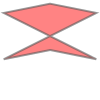

In [12]:
Polygon(polgonList)

In [13]:
line2reverse = list(reversed(line2))

In [14]:
polgonList2 = line1 + line2reverse

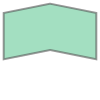

In [15]:
Polygon(polgonList2)